# Model Training

In [1]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import load_preprocessed_data, train_lstm_model, train_cnn_model, train_dt_model, train_lr_model, train_lasso_model
from src.utils import plot_training_history
from src.evaluation import evaluate_regression_model, evaluate_classification_model

# Load the default configuration
config = Config()


## MIT_Stanford

### LSTM

2025-04-09 22:26:20,955 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.8
2025-04-09 22:26:20,956 - INFO - Input shape derived from X_train: (20, 1)
2025-04-09 22:26:21,195 - INFO - LSTM model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', use_aachen=False, model_task='lstm_regression', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=32, lstm_dropout_rate=0.2, lstm_dense_units=16, learning_rate=0.001, clipnorm=1.0, epochs=50, patience=20, conv1_filters=32, conv1_kernel_size=5, conv2_filters=64, conv2_kernel_size=3, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_dense_units=64,

Epoch 1/50
404/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 - mae: 0.1187
Epoch 1: val_loss improved from inf to 0.01465, saving model to experiments/models/mit_stanford/lstm_regression_eol80_20250409_222621_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0256 - mae: 0.1177 - val_loss: 0.0147 - val_mae: 0.0831
Epoch 2/50
405/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - mae: 0.0861
Epoch 2: val_loss improved from 0.01465 to 0.01285, saving model to experiments/models/mit_stanford/lstm_regression_eol80_20250409_222621_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0146 - mae: 0.0859 - val_loss: 0.0128 - val_mae: 0.0773
Epoch 3/50
416/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - mae: 0.0784
Epoch 3: val_loss improved from 0.01285 to 0.01142, saving model to experiments/models/mit_stanford/lstm_regression_eol80_20250409_222621_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0129 - mae: 0.0783 - val_loss: 0.0114 - val_mae: 

2025-04-09 22:27:07,178 - INFO - Final LSTM model saved to experiments/models/mit_stanford/lstm_regression_eol80_20250409_222621_final.keras


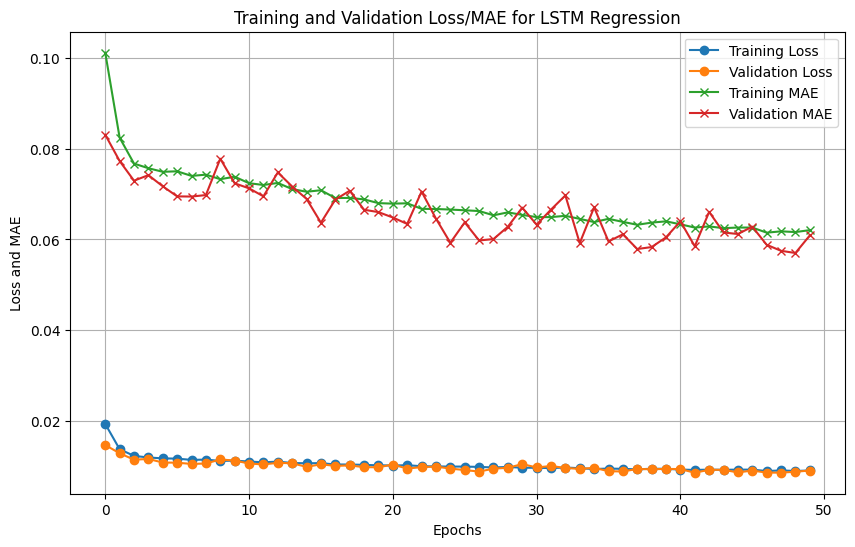

In [2]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "lstm_regression"

lstm_model, history = train_lstm_model(config)

plot_training_history(history, config.model_task)

### CNN

In [3]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "cnn_classification"

config.load_best_params()


NameError: name 'config' is not defined

In [6]:
model_task = "cnn_classification"
dataset = "MIT_Stanford"


# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity, config.use_aachen
)

# Update the configuration to use the best hyperparameters found in the hyperparameter tuning step
config.load_best_params(model_task)



2025-04-09 13:02:54,684 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.8


Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_cnn_classification_tuning_eol80_best_params.json: {'conv1_filters': 32, 'conv1_kernel_size': 5, 'l2_reg': 0.0001, 'conv2_filters': 32, 'conv2_kernel_size': 3, 'cnn_dense_units': 64, 'cnn_dropout_rate': 0.4, 'learning_rate': 0.0001}


In [2]:
cnn_model, history = train_cnn_model(config)

# Plot the training history
plot_training_history(history, model_task)

2025-04-09 22:21:59,094 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.8
2025-04-09 22:21:59,285 - INFO - CNN model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', use_aachen=True, model_task='lstm_regression', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=32, lstm_dropout_rate=0.2, lstm_dense_units=16, learning_rate=0.001, clipnorm=1.0, epochs=50, patience=20, conv1_filters=32, conv1_kernel_size=5, conv2_filters=64, conv2_kernel_size=3, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_dense_units=64, cnn_dropout_rate=0.5, max_depth=None, min_samples_split=2, min_samples_leaf=

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)

### DecisionTree Regressor

In [ ]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "dt_regression" 
config.load_best_params(config)

dt_model, metrics = train_dt_model(config)


2025-04-09 22:22:59,571 - INFO - Loaded preprocessed data and metadata for dt_regression with EOL 0.8


Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_dt_regression_tuning_eol80_best_params.json: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Decision Tree Final Test Metrics:
MSE: 0.0106, RMSE: 0.1031, R2: 0.6262, MAE: 0.0730


### Linear Regression

In [7]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "lr_regression" 
config.load_best_params(config.model_task)

lr_model, metrics = train_lr_model(config)

2025-04-09 22:23:00,889 - INFO - Loaded preprocessed data and metadata for lr_regression with EOL 0.8


Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_lr_regression_tuning_eol80_best_params.json: {'fit_intercept': True}

Linear Regression Final Test Metrics:
MSE: 0.0134, RMSE: 0.1158, R2: 0.5281, MAE: 0.0982


### Lasso Regression

In [8]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "lasso_regression" 
config.load_best_params(config.model_task)

lasso_model, metrics = train_lasso_model(config)

2025-04-09 22:23:02,557 - INFO - Loaded preprocessed data and metadata for lasso_regression with EOL 0.8


Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_lasso_regression_tuning_eol80_best_params.json: {'alpha': 0.0001, 'max_iter': 5000, 'selection': 'cyclic', 'tol': 0.001}

Lasso Regression Final Test Metrics:
MSE: 0.0134, RMSE: 0.1158, R2: 0.5281, MAE: 0.0982
